# Support Vector Machines

In [15]:
import pandas as pd
import numpy as np

from sklearn import svm

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

In [16]:
n_cls = 20

np.random.seed(1)
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)
x22 = np.random.normal(-0.5, 1, (n_cls, 1))

X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))

y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

In [17]:
model = svm.SVC(kernel='linear', C=1000, random_state=42, probability=True)

model.fit(X, y)

SVC(C=1000, kernel='linear', probability=True, random_state=42)

In [18]:
X, y.T

(array([[ 2.12434536e+00, -1.67578474e-02],
        [-1.11756414e-01,  3.43733173e-01],
        [-2.81717523e-02, -1.73619610e+00],
        [-5.72968622e-01,  2.04027081e+00],
        [ 1.36540763e+00, -1.39343559e+00],
        [-1.80153870e+00, -4.41747366e-01],
        [ 2.24481176e+00,  9.02881417e-01],
        [-2.61206901e-01, -8.45288087e-01],
        [ 8.19039096e-01, -6.57952219e-01],
        [ 2.50629625e-01, -5.09007615e-01],
        [ 1.96210794e+00,  9.51454045e-01],
        [-1.56014071e+00,  2.69220801e+00],
        [ 1.77582796e-01,  4.41539393e-01],
        [ 1.15945645e-01, -7.17925445e-01],
        [ 1.63376944e+00,  9.39058321e-01],
        [-5.99891267e-01, -1.96159700e-01],
        [ 3.27571792e-01,  3.80869503e-01],
        [-3.77858418e-01,  1.57500122e+00],
        [ 5.42213747e-01, -3.47870949e-01],
        [ 1.08281521e+00,  4.09025251e-01],
        [ 1.48862847e+00, -4.49438293e-01],
        [ 1.36509851e-01, -4.86667622e-05],
        [-2.03502532e-01, -1.495

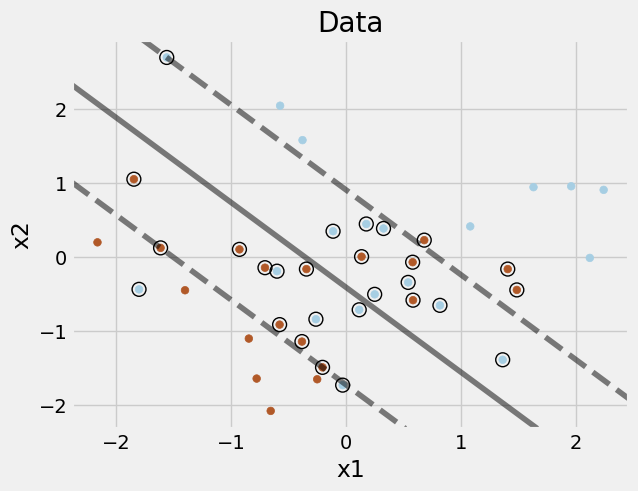

In [19]:
fig = plt.figure(1)
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

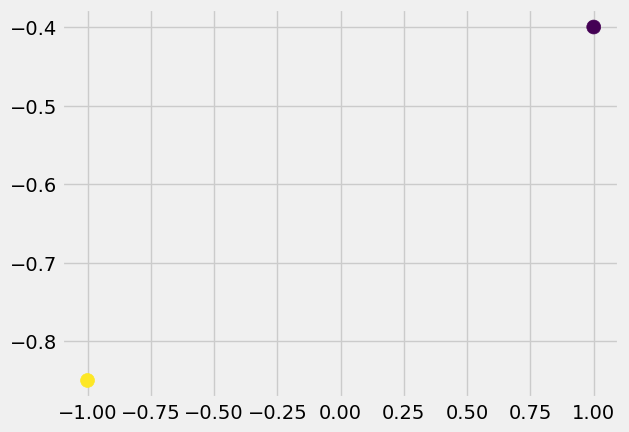

In [20]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
])

y_new = model.predict(X_new)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

In [21]:
post_probs = model.predict_proba(X_new)
print(post_probs)

[[0.62696392 0.37303608]
 [0.31081748 0.68918252]]


### **Zadanie 1 - Klasyfikacja**

**1. Wybrać jeden z dostępnych datasetów w pakiecie scikit-learn (np. bazę iris).**

In [22]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**2. Wybrany dataset należy zwiazualizować (np. w formie tabeli, wykresu cech, macierzy korelacji cech itp.).**

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

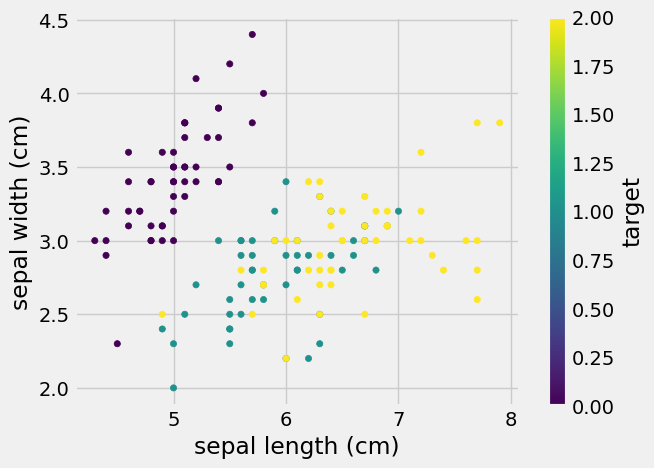

In [23]:
matplotlib.style.use('fivethirtyeight') 
df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', c='target', colormap=plt.cm.viridis)

Text(0.5, 0, '[cm]')

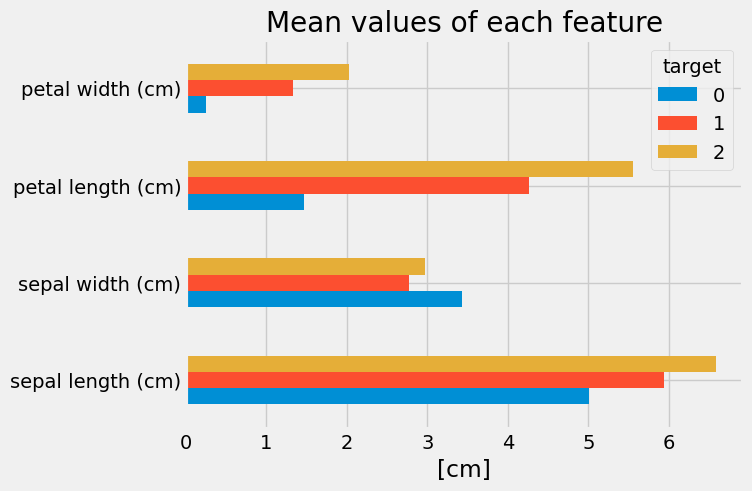

In [24]:
# Create barh graph of mean of every feature for each target
df.groupby('target').mean().T.plot(kind='barh')
plt.title('Mean values of each feature')
plt.xlabel('[cm]')

In [25]:
corr_matrix = df.corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


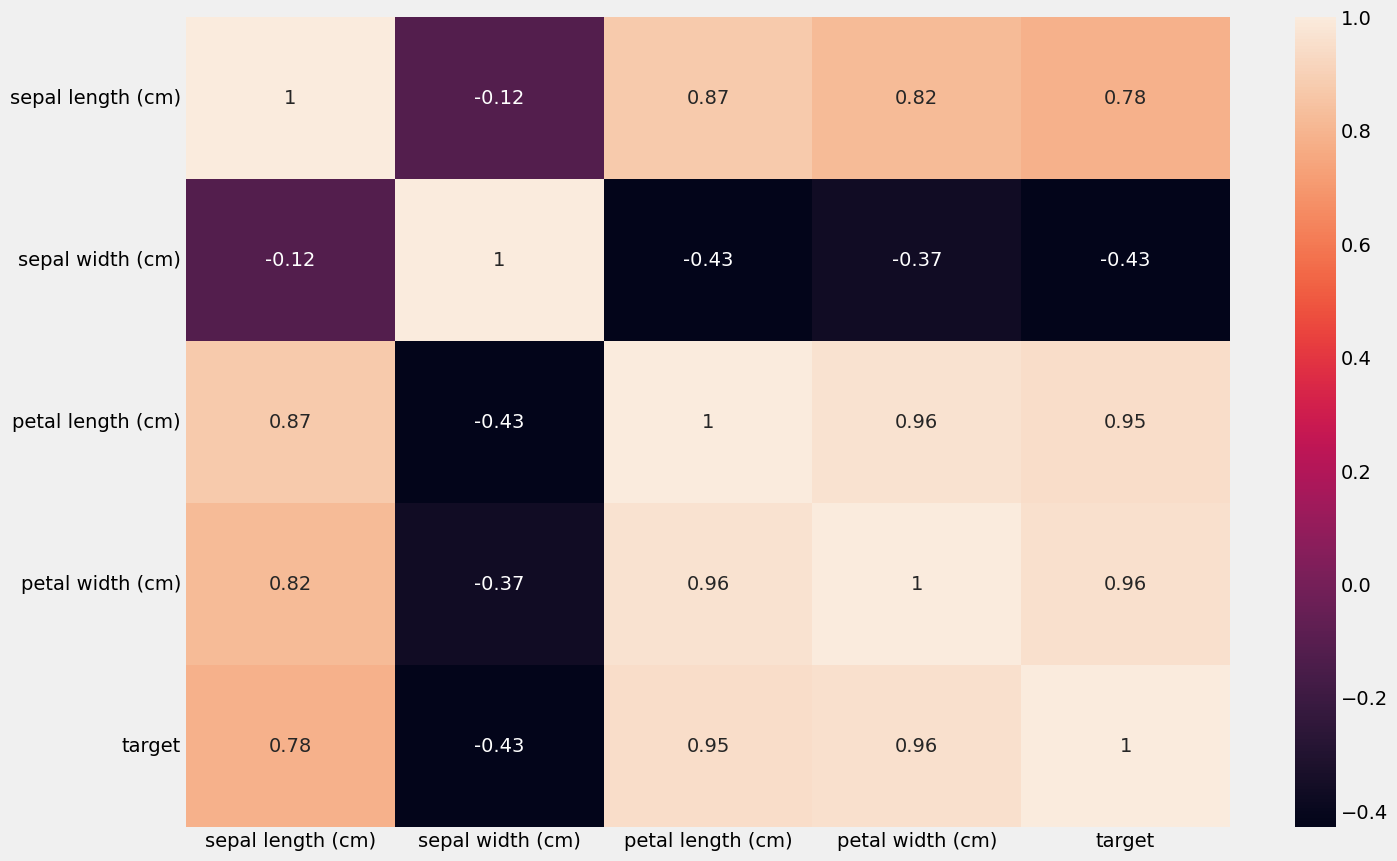

In [26]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(
    data=corr_matrix,
    annot=True
)

**3. Przy pomocy SVM spróbować zklasyfikować wszystkie dostepny klasy (tzw. Multiclass Classification problem)**

In [27]:
# Prepare data
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train_sepal, X_test_sepal = X_train.drop(['petal length (cm)', 'petal width (cm)'], axis=1), X_test.drop(['petal length (cm)', 'petal width (cm)'], axis=1)
X_train_petal, X_test_petal = X_train.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1), X_test.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)


In [28]:
model_sepal = svm.SVC(kernel='linear', C=1000, random_state=42, probability=True)
model_petal = svm.SVC(kernel='linear', C=1000, random_state=42, probability=True)

model_sepal.fit(X_train_sepal, y_train)
model_petal.fit(X_train_petal, y_train)

C:\Users\adamp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\adamp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\adamp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\adamp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

SVC(C=1000, kernel='linear', probability=True, random_state=42)

C:\Users\adamp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\adamp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\adamp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\adamp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_

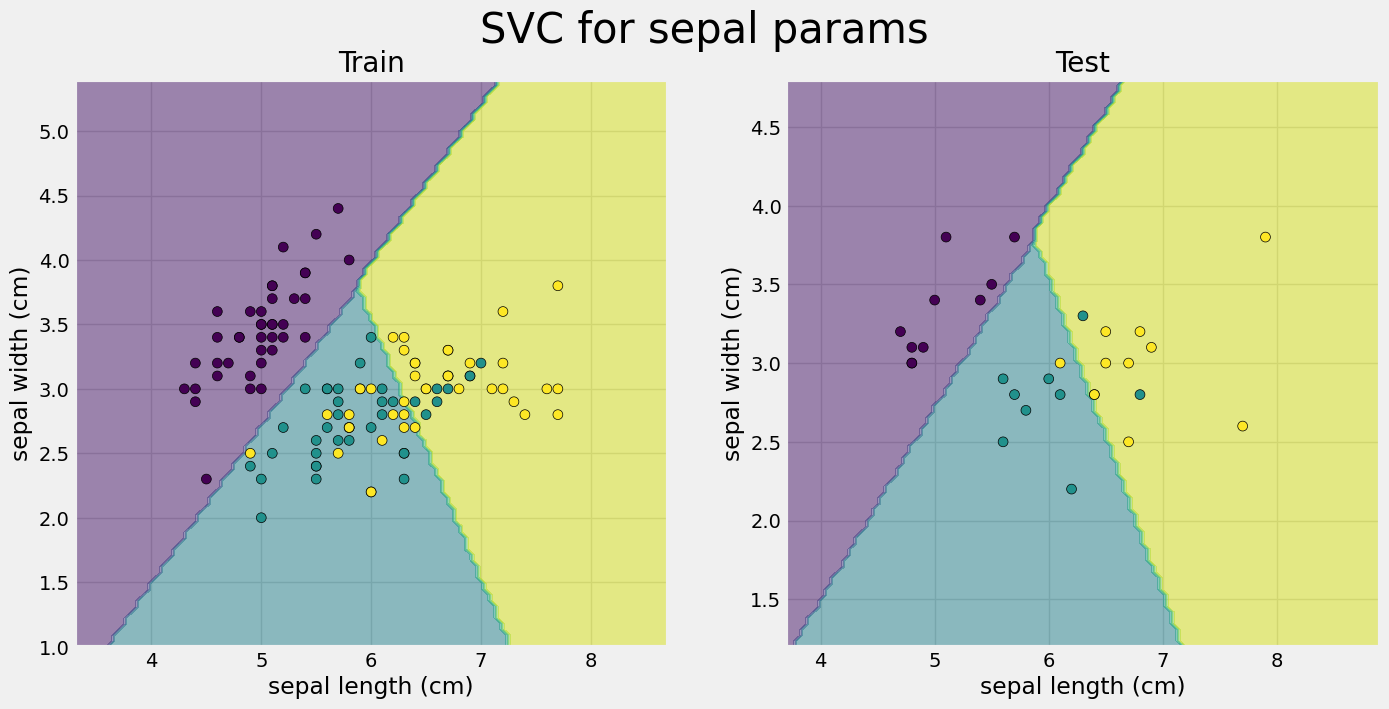

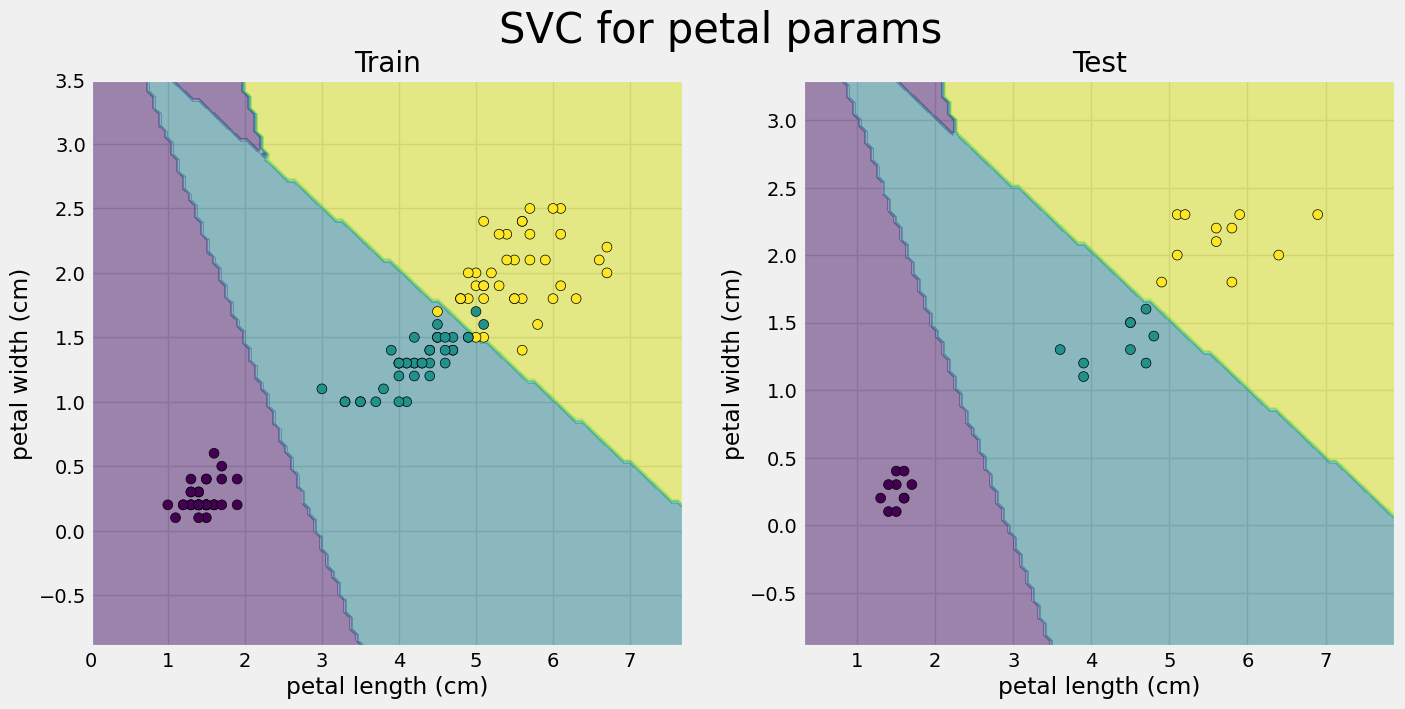

In [29]:
%matplotlib inline

for model in [model_sepal, model_petal]:
    fig, ax = plt.subplots(1, 2, figsize=(15,7))
    # plt.subplots_adjust(wspace=1.5, hspace=1.5)

    if model == model_sepal:
        fig.suptitle("SVC for sepal params", fontsize=30)
        X_temp = (X_train_sepal, X_test_sepal)
        X0_train = X_train_sepal['sepal length (cm)']
        X1_train = X_train_sepal['sepal width (cm)']
        X0_test = X_test_sepal['sepal length (cm)']
        X1_test = X_test_sepal['sepal width (cm)']
    else:
        fig.suptitle("SVC for petal params", fontsize=30)
        X_temp = (X_train_petal, X_test_petal)
        X0_train = X_train_petal['petal length (cm)']
        X1_train = X_train_petal['petal width (cm)']
        X0_test = X_test_petal['petal length (cm)']
        X1_test = X_test_petal['petal width (cm)']

    for i in [0, 1]:
        disp = DecisionBoundaryDisplay.from_estimator(
            model,
            X_temp[i],
            response_method='predict',
            cmap=plt.cm.viridis,
            alpha=0.5,
            ax=ax[i],
            xlabel=X_temp[i].columns[0],
            ylabel=X_temp[i].columns[1]
        )
        if i == 0:
            ax[i].scatter(X0_train, X1_train, c=y_train, cmap=plt.cm.viridis, edgecolors='k', s=50)
            ax[i].set_title('Train')
        else:
            ax[i].scatter(X0_test, X1_test, c=y_test, cmap=plt.cm.viridis, edgecolors='k', s=50)
            ax[i].set_title('Test')
        # ax[i].set_xticks(())
        # ax[i].set_yticks(())
    

    fig.show()

In [30]:
print(X_train_petal.columns[0])

petal length (cm)


NameError: name 'model1' is not defined

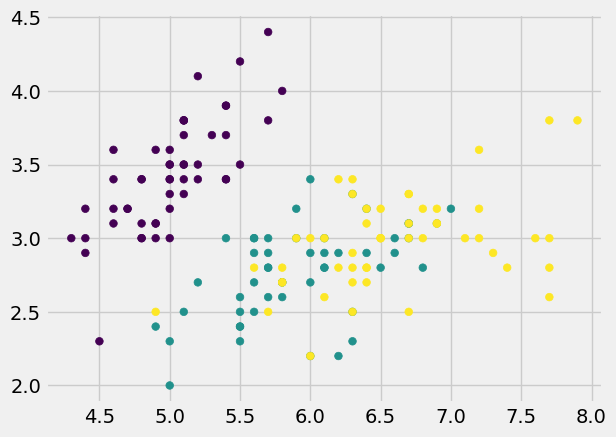

In [31]:
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y, s=30, cmap=plt.cm.viridis)

# decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model1.decision_function(xy).reshape(XX.shape)

# decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# support vectors
# ax.scatter(model1.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()